In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from load_data import select_experiment
import definitions as defs
import plot_defs as myplot


In [2]:
#experiments = ['01_21','11_21','12_12','01_09','09_02','11_29']
experiments = ['E1','E2','E3','E4','E5','E6']

select = 0
[expval_pauli, expval_witnesses, probs, counts_tot, VV, num_states] = select_experiment(select)

OK


In [3]:
# Create indices for training and testing sets
training = 'ent'

#Train only with separable states
if training == 'sep':
    kkk = num_states // 2
    indtrain = range(kkk)
    indtest = np.setdiff1d(np.arange(num_states), indtrain)
    colors = ['#9CEBA8','#5ABE69','#148125','#9CEBA8']
    cmcolor = 'Greens'
else:
    #Train with separable and entangled states
    kkk = num_states//4
    indtrain =  np.hstack([range(kkk),range(2*kkk,3*kkk)])
    indtest = np.hstack([range(kkk,2*kkk),range(3*kkk,4*kkk)])
    colors = ['#69CFFF','#2A8CBA','#184ACB','#69CFFF']
    cmcolor = 'Blues'

In [4]:
# Define witness operators
witnesses = defs.witnesses

# Use the expectation values of the witnesses as the target variable
y = expval_witnesses
# Use the total counts as the input variable
v = counts_tot

# Split into training and testing sets
ytrain = y[indtrain]
ytest = y[indtest]
vtrain = v[indtrain]
vtest = v[indtest]

# Calculate the weights using the pseudoinverse of the training input and the training target
W = np.linalg.pinv(vtrain) @ ytrain

# Predict the target variable for the training and testing sets
ypred1 = vtrain @ W.real
ypred2 = vtest @ W.real

# Calculate the mean squared error for the training and testing sets
msetrain = np.array([defs.MSE(ytrain.T[k], ypred1.T[k]) for k in range(len(witnesses))])
msetest = np.array([defs.MSE(ytest.T[k], ypred2.T[k]) for k in range(len(witnesses))])

# Print the mean squared error for the first witness
print("MSE train=", np.round(msetrain, 4))
print("MSE test=", np.round(msetest, 4))

MSE train= [0.0098 0.0005 0.0128 0.0112]
MSE test= [0.0158 0.001  0.0205 0.0233]


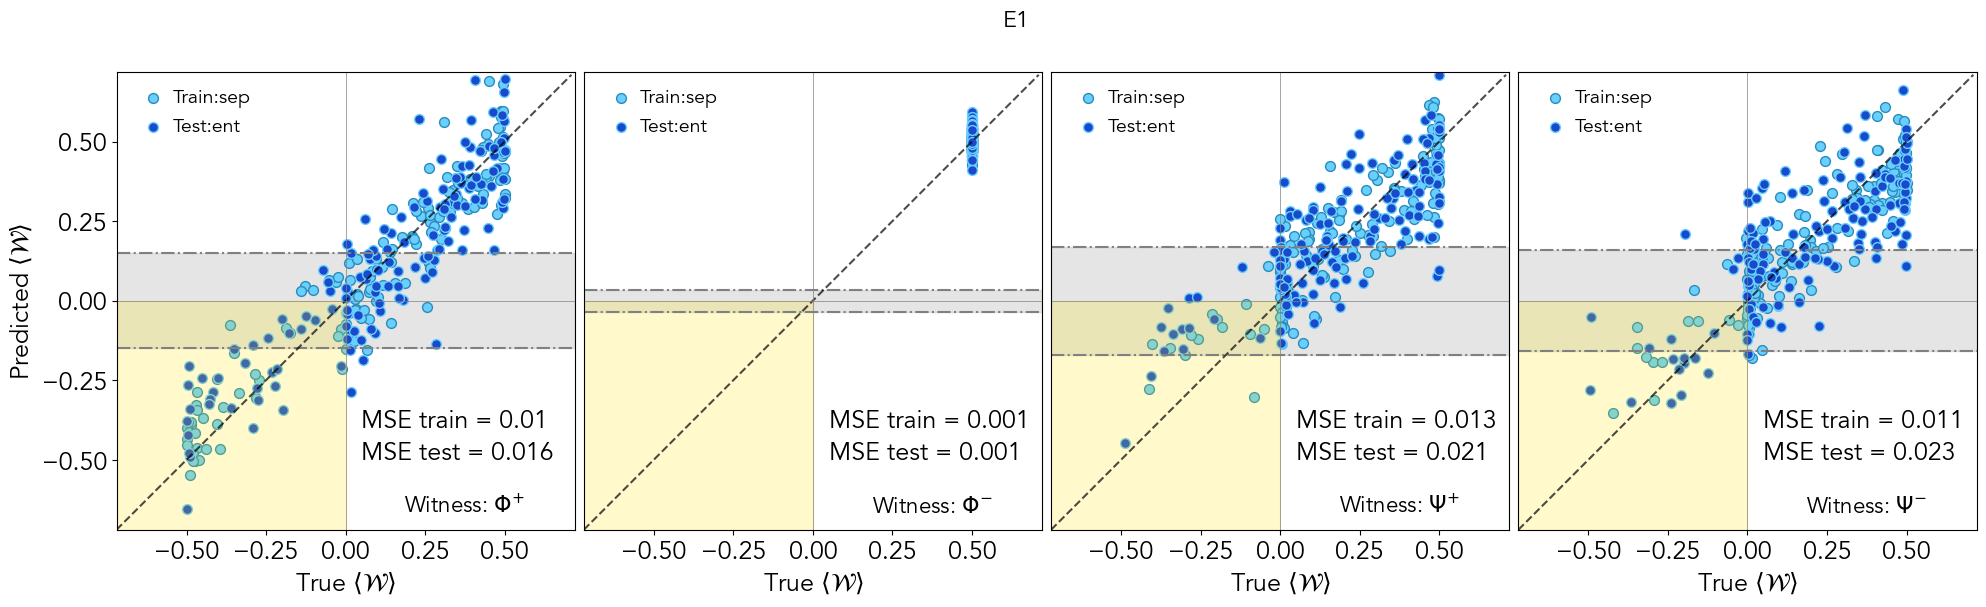

In [5]:
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 14,
    "font.family": "Avenir",
})
plot_labels = [ "Witness: $\Phi^{+}$", "Witness: $\Phi^{-}$","Witness: $\Psi^{+}$", "Witness: $\Psi^{-}$"]

fig, axes = plt.subplots(1, 4, figsize=(24, 6),gridspec_kw = {'wspace':0.02, 'hspace':0.02})
fig.suptitle(experiments[select])
for k in range(4):
    myplot.witness_plot(plot_labels[k],ytrain.T[k],ypred1.T[k],ytest.T[k],ypred2.T[k],msetrain[k],axes[k],k,['Train:sep','Test:ent'],colors)
    axes[k].annotate('MSE train = '+str(np.round(msetrain[k], 3)), xy=(0.5, 0.5), xytext=(0.05, -0.4),
             fontsize=18, color='k')
    axes[k].annotate('MSE test = '+str(np.round(msetest[k], 3)), xy=(0.5, 0.5), xytext=(0.05, -0.5),
             fontsize=18, color='k')

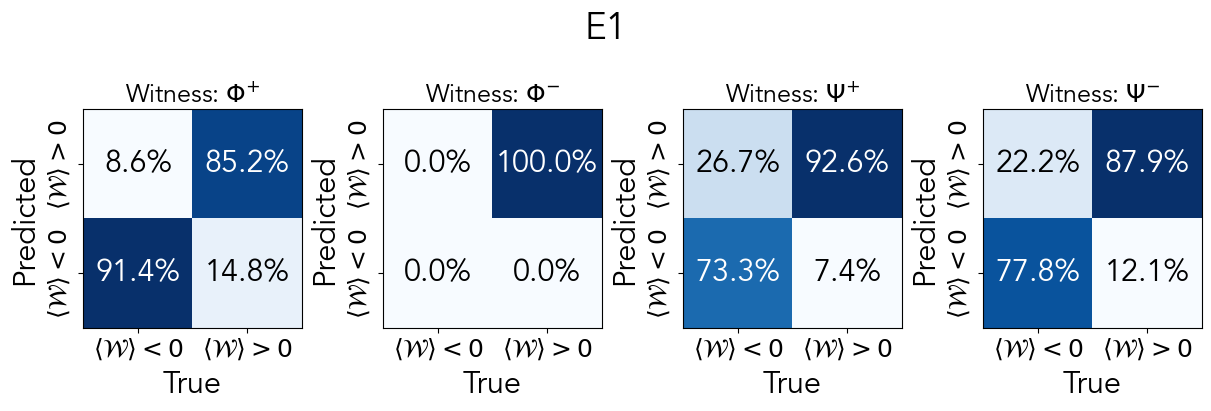

In [6]:
plt.rcParams.update({
    "font.size": 22,
    "axes.titlesize": 18,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 16,
    "font.family": "Avenir",
})
fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)
fig.suptitle(experiments[select])
for k, ax in enumerate(axes):
    y_true = np.sign(ytest[:,k])
    y_pred = np.sign(ypred2[:,k])
    cm = defs.my_confusion_matrix2(y_pred,y_true)*100
    myplot.cm_plot(cm,ax=ax,title=plot_labels[k],cmap=cmcolor)

# Pauli plots

In [7]:
# Define Pauli matrices
pauli2 = defs.pauli2

# Use the expectation values of the Pauli matrices as the target variable
y = expval_pauli
# Use the total counts as the input variable
v = counts_tot

# Split into training and testing sets
ytrain = y[indtrain]
ytest = y[indtest]
vtrain = v[indtrain]
vtest = v[indtest]

# Calculate the weights using the pseudoinverse of the training input and the training target
W = np.linalg.pinv(vtrain) @ ytrain

# Predict the target variable for the training and testing sets
ypred1 = vtrain @ W.real
ypred2 = vtest @ W.real

# Calculate the mean squared error for the training and testing sets
msetrain = np.array(np.split(np.array([defs.MSE(ytrain.T[k], ypred1.T[k]) for k in range(len(pauli2))]), 4))
msetest = np.array(np.split(np.array([defs.MSE(ytest.T[k], ypred2.T[k]) for k in range(len(pauli2))]), 4))

# Print the mean squared error for the training and testing sets
print("Mean Squared Error for Training Set:")
print(msetrain)
print("Mean Squared Error for Testing Set:")
print(msetest)

Mean Squared Error for Training Set:
[[0.0021362  0.00957584 0.01015678 0.00862754]
 [0.00957584 0.04464245 0.02011685 0.03214104]
 [0.01015678 0.02011685 0.0510605  0.02797951]
 [0.00862754 0.03214104 0.02797951 0.03916852]]
Mean Squared Error for Testing Set:
[[0.0041025  0.02724227 0.02420705 0.01343555]
 [0.02724227 0.09301251 0.03988622 0.07097409]
 [0.02420705 0.03988622 0.08203805 0.05474527]
 [0.01343555 0.07097409 0.05474527 0.06316808]]


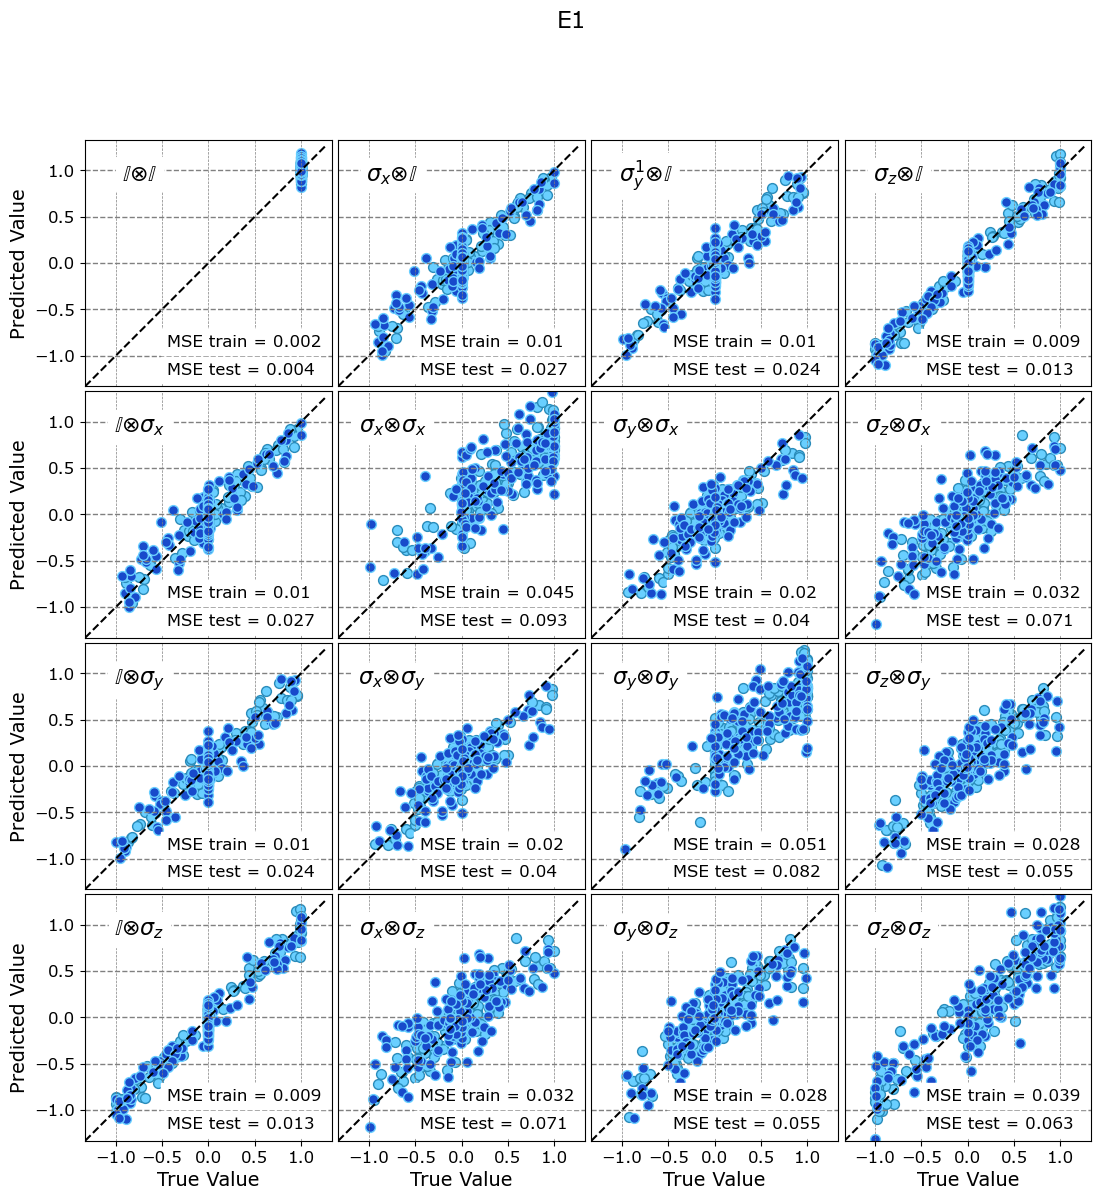

In [8]:
plt.rcParams.update({
    "font.family": "Verdana",
    "font.size": 14,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

plot_labels = ['$\mathbb{I}⊗\mathbb{I}$', '$\sigma_x⊗\mathbb{I}$', '$\sigma_y^1⊗\mathbb{I}$', '$\sigma_z⊗\mathbb{I}$', 
               '$\mathbb{I}⊗\sigma_x$', '$\sigma_x⊗\sigma_x$', '$\sigma_y⊗\sigma_x$', '$\sigma_z⊗\sigma_x$', 
               '$\mathbb{I}⊗\sigma_y$', '$\sigma_x⊗\sigma_y$', '$\sigma_y⊗\sigma_y$', '$\sigma_z⊗\sigma_y$', 
               '$\mathbb{I}⊗\sigma_z$', '$\sigma_x⊗\sigma_z$', '$\sigma_y⊗\sigma_z$', '$\sigma_z⊗\sigma_z$']
# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(13, 13), gridspec_kw = {'wspace':0.02, 'hspace':0.02})#, constrained_layout=True)
fig.suptitle( experiments[select])
for k, ax in enumerate(axes.flatten()):
    myplot.pauli_plot(plot_labels[k],ytrain.T[k],ypred1.T[k],ytest.T[k],ypred2.T[k],ax,k,['Train:sep','Test:ent'],colors)
    ax.annotate('MSE train = '+str(np.round(msetrain.flatten()[k], 3)), xy=(0.5, 0.5), xytext=(-0.45, -0.9),
             fontsize=12, color='k', backgroundcolor = 'white')
    ax.annotate('MSE test = '+str(np.round(msetest.flatten()[k], 3)), xy=(0.5, 0.5), xytext=(-0.45, -1.2),
             fontsize=12, color='k', backgroundcolor = 'white')

# SHADOW plots

In [9]:
effectivePOVM = np.array([defs.to_dm(v) for v in VV.conj()])

framesuperoperator = np.sum([np.outer(mu.flatten(),mu.flatten().conj()) for mu in effectivePOVM],axis=0)
framesuperoperatorrescaledID = 4*np.sum([np.outer(mu.flatten(),mu.flatten().conj())/np.trace(mu) for mu in effectivePOVM],axis=0)

canonicaldual = np.array([(np.linalg.inv(framesuperoperator)@mu.flatten()).reshape(4,4) for mu in effectivePOVM])
canonicaldualrescaledID = np.array([(np.linalg.inv(framesuperoperatorrescaledID)@mu.flatten()/np.trace(mu)).reshape(4,4) for mu in effectivePOVM])

In [11]:
res = []  # Store results for all witnesses
statlist = np.logspace(1.8, 4.1, num=200)

for wit in range(4):  # Iterate over witnesses[0] to witnesses[3]
    est = np.array([np.trace(witnesses[wit] @ ob).real for ob in canonicaldualrescaledID])
    res_wit = []  # Store results for a specific witness
    
    for stat in statlist:
        #res_wit += [np.mean([np.abs(np.sum(est * counts_tot[k]/stat) - expval_witnesses[k, wit]) ** 2 for k in np.hstack([range(kkk,2*kkk),range(3*kkk,4*kkk)])])]
        res_wit += [np.mean([np.abs(np.sum(est * counts_tot[k]/stat) - expval_witnesses[k, wit]) ** 2 for k in range(num_states//2)])]
    
    res.append(res_wit) 

Text(0, 0.5, 'MSE')

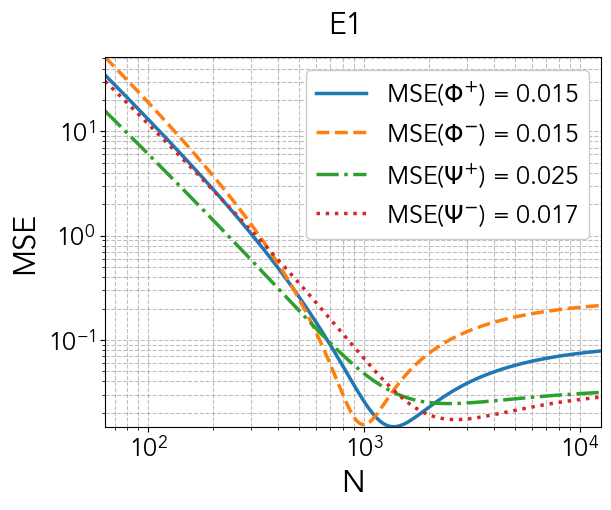

In [12]:
plt.rcParams.update({
    "font.size": 18,
    "axes.titlesize": 18,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "font.family": "Avenir",
})
plot_labels = ["MSE($\Phi^{+}$) = "+str(np.round(np.min(res[0]), 3)), 
               "MSE($\Phi^{-}$) = "+str(np.round(np.min(res[1]), 3)),
               "MSE($\Psi^{+}$) = "+str(np.round(np.min(res[2]), 3)), 
               "MSE($\Psi^{-}$) = "+str(np.round(np.min(res[3]), 3))]
linestyles = ['-','--','-.','dotted']
for wit in range(4):
    plt.plot(statlist,res[wit],linestyle=linestyles[wit], linewidth=2.5,label=plot_labels[wit])
plt.legend(loc="best",facecolor='w',framealpha=1,frameon=True)

plt.xscale('log')
plt.yscale('log')
#plt.ylim(5*10**-3, 15)
plt.margins(0)
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.suptitle(experiments[select])
plt.xlabel('N')
plt.ylabel('MSE')

# SINGULAR VALUES plots

In [13]:
statEXP=np.mean(np.sum(counts_tot[:num_states//2],axis=1))/np.mean(np.sum(probs[:num_states//2],axis=1))
sing1= np.linalg.svd(probs[:num_states//2])[1]
sing2 = np.linalg.svd(np.array([defs.dirtprobs(p,100) for p in probs[:num_states//2]]))[1]
sing3 = np.linalg.svd(np.array([defs.dirtprobs(p,1000) for p in probs[:num_states//2]]))[1]
sing4 = np.linalg.svd(np.array([defs.dirtprobs(p,10000) for p in probs[:num_states//2]]))[1]
sing5 = np.linalg.svd(np.array([defs.dirtprobs(p,100000) for p in probs[:num_states//2]]))[1]
singEXP = np.linalg.svd(counts_tot[:num_states//2]/(statEXP))[1]

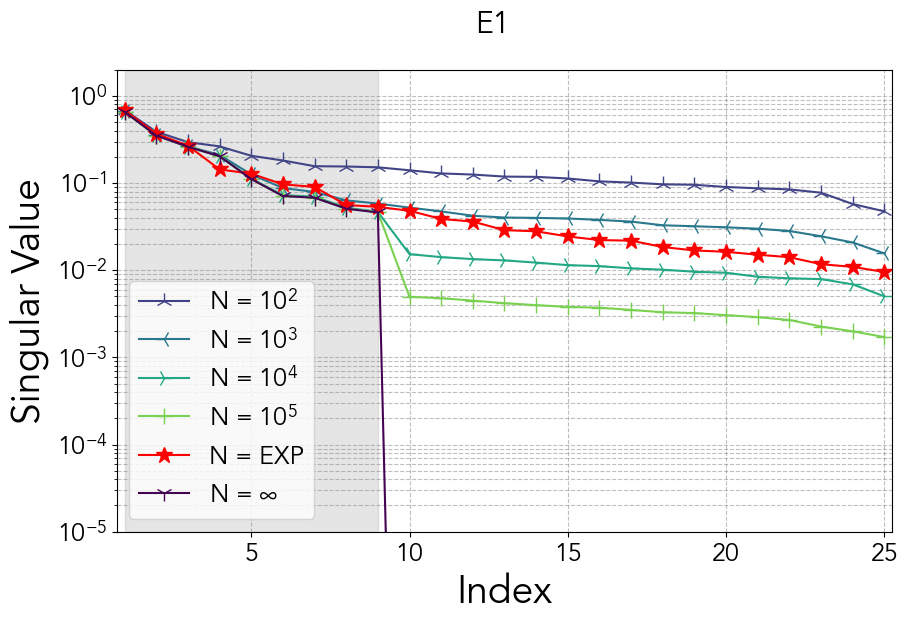

In [15]:
plt.rcParams.update({
    "font.size": 18,
    "axes.titlesize": 18,
    "axes.labelsize": 28,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "font.family": "Avenir",
    "text.usetex": False,  # Ensure we're using Mathtext, not LaTeX
    "mathtext.fontset": "custom",
    "mathtext.rm": "Avenir",
    "mathtext.it": "Avenir:italic",
    "mathtext.bf": "Avenir:bold",
})

colors = plt.cm.viridis(np.linspace(0, 1, 6))

# Create the plot
plt.figure(figsize=(10, 6))

plt.axvspan(1,9, color='gray', alpha=0.2)  


plt.plot(range(1,26),sing2,   marker='2',  linestyle='-',  color=colors[1], markersize=12,     label='N = $10^2$')
plt.plot(range(1,26),sing3,   marker='3',  linestyle='-',  color=colors[2], markersize=12,     label='N = $10^3$')
plt.plot(range(1,26),sing4,   marker='4',  linestyle='-',  color=colors[3], markersize=12,     label='N = $10^4$')
plt.plot(range(1,26),sing5,   marker='+',  linestyle='-',  color=colors[4], markersize=12,     label='N = $10^5$')
plt.plot(range(1,26),singEXP, marker='*',  linestyle='-',  color='r',       markersize=12,     label='N = EXP')
plt.plot(range(1,26),sing1,   marker='1',  linestyle='-',  color=colors[0], markersize=12,     label='N = $\\infty$')

# Add grid
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.suptitle(experiments[select])
plt.yscale('log')
plt.ylim(1e-5,2e0)

plt.legend()
plt.legend(loc="best")
plt.margins(.01)

#plt.savefig(f'../figures/{experiments[select]}_sing.pdf', bbox_inches='tight')
